In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import time
from pprint import pprint
from tabulate import tabulate
from sklearn.tree import export_graphviz
import eli5
from eli5.sklearn import PermutationImportance

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [215]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [216]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [217]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

***Exploratory data analysis***

In [218]:
df = df[df['thal'] != 0]
df = df[df['age'] != 29]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [219]:
df['thal'] = df['thal'].replace(1, 'fixed defect')
df['thal'] = df['thal'].replace(2, 'normal')
df['thal'] = df['thal'].replace(3, 'reversable defect')
df['cp'] = df['cp'].replace(0, 'asymptomatic')
df['cp'] = df['cp'].replace(1, 'atypical angina')
df['cp'] = df['cp'].replace(2, 'non-anginal pain')
df['cp'] = df['cp'].replace(3, 'typical angina')
df['restecg'] = df['restecg'].replace(0, 'ventricular hypertrophy')
df['restecg'] = df['restecg'].replace(1, 'normal')
df['restecg'] = df['restecg'].replace(2, 'ST-T wave abnormality')
df['slope'] = df['slope'].replace(0, 'downsloping')
df['slope'] = df['slope'].replace(1, 'flat')
df['slope'] = df['slope'].replace(2, 'upsloping')

In [220]:
temp = pd.get_dummies(df[['cp', 'restecg', 'slope', 'thal']])
df = df.join(temp, how='left')
df = df.drop(columns = ['cp','restecg', 'slope', 'thal'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_typical angina,restecg_ST-T wave abnormality,restecg_normal,restecg_ventricular hypertrophy,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,1,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,0,1,0,1,0


In [221]:
df = df.drop(columns = ['restecg_ventricular hypertrophy', 'slope_upsloping', 'thal_fixed defect', 'cp_typical angina'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,restecg_ST-T wave abnormality,restecg_normal,slope_downsloping,slope_flat,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,1,1,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,1,0,0,1,0


In [222]:
df = df.drop_duplicates()
df.shape

(299, 19)

In [223]:
df.corr()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,restecg_ST-T wave abnormality,restecg_normal,slope_downsloping,slope_flat,thal_normal,thal_reversable defect
age,1.000000,-0.090431,0.285841,0.201707,0.120366,-0.384344,0.089257,0.200313,0.299290,-0.217330,0.127413,-0.133565,-0.057174,0.084270,-0.167860,0.026469,0.167664,-0.126826,0.099734
sex,-0.090431,1.000000,-0.058280,-0.196278,0.040147,-0.060667,0.139828,0.096829,0.113694,-0.281542,0.087992,-0.047183,-0.111368,-0.108112,-0.019268,0.047007,-0.012042,-0.388190,0.326368
trestbps,0.285841,-0.058280,1.000000,0.124407,0.181206,-0.048787,0.069172,0.194235,0.098315,-0.146827,0.022518,-0.082033,-0.047018,0.058607,-0.149129,0.122360,0.026312,-0.144055,0.109698
chol,0.201707,-0.196278,0.124407,1.000000,0.016228,-0.001245,0.065246,0.045986,0.081976,-0.080710,0.065598,-0.010893,-0.031551,0.033427,-0.174005,-0.048939,0.046078,-0.003161,0.050598
fbs,0.120366,0.040147,0.181206,0.016228,1.000000,-0.008524,0.011637,0.002377,0.150551,-0.015906,-0.073661,-0.056382,0.094008,-0.048370,-0.076915,0.107496,-0.046466,-0.078421,0.034483
thalach,-0.384344,-0.060667,-0.048787,-0.001245,-0.008524,1.000000,-0.383718,-0.345125,-0.229265,0.426008,-0.379721,0.236579,0.177616,-0.121835,0.101938,-0.055525,-0.423787,0.286421,-0.213889
exang,0.089257,0.139828,0.069172,0.065246,0.011637,-0.383718,1.000000,0.284981,0.126419,-0.430393,0.463117,-0.232138,-0.266311,0.042728,-0.102087,0.059028,0.249159,-0.325762,0.301507
oldpeak,0.200313,0.096829,0.194235,0.045986,0.002377,-0.345125,0.284981,1.000000,0.233399,-0.426985,0.274748,-0.277216,-0.126731,0.167810,-0.142882,0.393549,0.305953,-0.340765,0.297366
ca,0.299290,0.113694,0.098315,0.081976,0.150551,-0.229265,0.126419,0.233399,1.000000,-0.410216,0.232282,-0.130586,-0.108099,0.031696,-0.105315,-0.042099,0.153878,-0.240295,0.211445
target,-0.217330,-0.281542,-0.146827,-0.080710,-0.015906,0.426008,-0.430393,-0.426985,-0.410216,1.000000,-0.509937,0.243925,0.311708,-0.068197,0.184313,-0.062463,-0.354098,0.527992,-0.486767


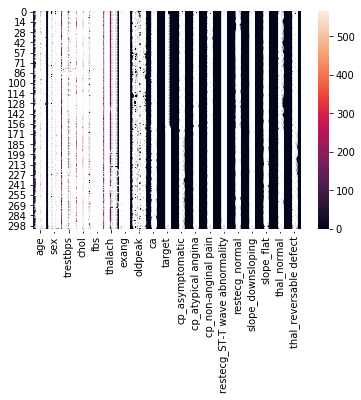

In [224]:
ax = sns.heatmap(df, annot=True)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


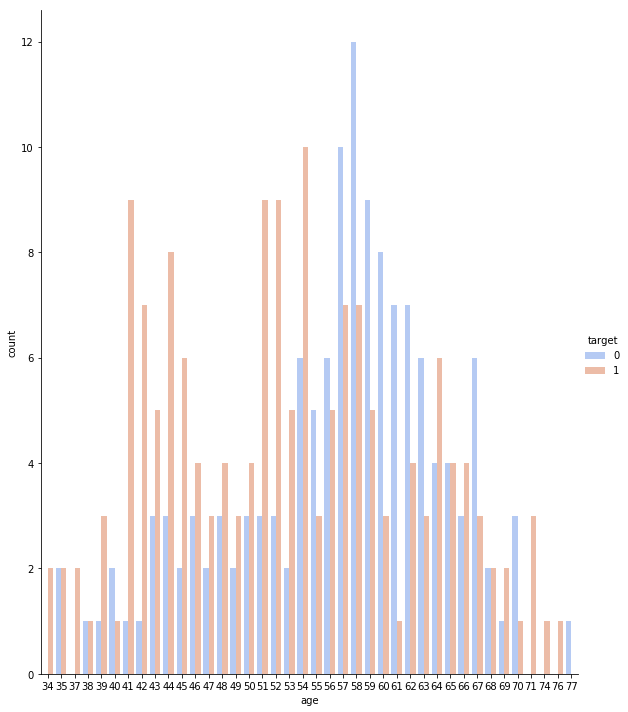

In [225]:
sns.factorplot('age', kind='count', hue='target', data=df, palette='coolwarm', height=10, aspect=.8)

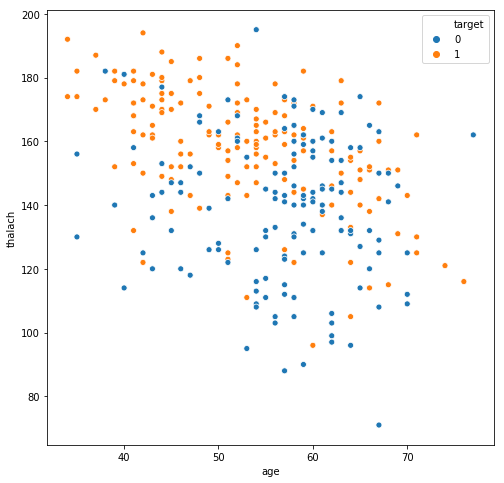

In [226]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['age'],y=df['thalach'],hue=df['target'])
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()

1    162
0    137
Name: target, dtype: int64

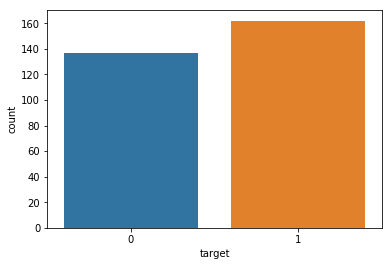

In [227]:
sns.countplot(df.target)
df.target.value_counts()

In [228]:
features = ['age', 'ca', 'cp_asymptomatic', 'exang', 'oldpeak',
  'slope_flat', 'thal_normal', 'thal_reversable defect',
  'thalach', 'cp_non-anginal pain', 'trestbps',
  'sex', 'chol', 'restecg_normal', 'cp_atypical angina',
  'slope_downsloping', 'fbs','restecg_ST-T wave abnormality', 'target']

df = df[features]

In [229]:
X = df.drop(['target'], axis=1)
Y = df['target']
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=0)

In [230]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [231]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2],
    'min_samples_leaf': [5],
    'n_estimators': [200],
    'oob_score': [True],
    'random_state': [0],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                      cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(train_features, train_labels);

grid_search.best_params_
best_grid = grid_search.best_estimator_
pprint(best_grid.get_params())

selector = RFE(rf, step=1, verbose=3)
selector = selector.fit(train_features, train_labels)
print("Features sorted by their rank:")
pprint(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), X)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Fitting estimator with 10 features.
Features sorted by their rank:
[(1, 'age'),
 (1, 'ca'),
 (1, 'chol'),
 (1, 'cp_asymptomatic'),
 (1, 'oldpeak'),
 (1, 'thal_normal'),
 (1, 'thal_reversable defect'),
 (1, 'thalach'),
 (1, 'trestbps'),
 (2, 'exang'),
 (3, 'slope_flat'),
 (4, 'cp_non-anginal pain'),
 (5, 'restecg_normal'),
 (6, 'sex'),
 (7, 'cp_atypical angina'),
 (8, 'slope_downsloping'),
 (9, 'fbs'),
 (10, 'restecg_ST-T wave abnormality')]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [232]:
rf = RandomForestClassifier(**best_grid.get_params())
dt = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [233]:
rf.fit(train_features, train_labels)
dt.fit(train_features, train_labels)
lr.fit(train_features, train_labels)
knn.fit(train_features, train_labels)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [234]:
rf_pred_train = rf.predict(train_features)
dt_pred_train = dt.predict(train_features)
lr_pred_train = lr.predict(train_features)
knn_pred_train = knn.predict(train_features)
rf_pred_test = rf.predict(test_features)
dt_pred_test = dt.predict(test_features)
lr_pred_test = lr.predict(test_features)
knn_pred_test = knn.predict(test_features)

In [235]:
rf_prob = rf.predict_proba(test_features)[:,1]
dt_prob = dt.predict_proba(test_features)[:,1]
lr_prob = lr.predict_proba(test_features)[:,1]
knn_prob = knn.predict_proba(test_features)[:,1]

In [236]:
rf_prob

array([0.3189985 , 0.13924286, 0.82777502, 0.68235698, 0.32292708,
       0.3340181 , 0.22557039, 0.43319068, 0.82432849, 0.61188857,
       0.15664205, 0.80686253, 0.1317662 , 0.43125894, 0.71050329,
       0.68788783, 0.55640339, 0.77384389, 0.83795713, 0.57585976,
       0.12177698, 0.70477018, 0.65316565, 0.81131131, 0.18446664,
       0.85229673, 0.3474035 , 0.18198069, 0.30991249, 0.47706173,
       0.74772409, 0.81147521, 0.62872678, 0.86574473, 0.27235585,
       0.53562191, 0.28267439, 0.63477603, 0.74644873, 0.50157924,
       0.40339855, 0.38316144, 0.53332619, 0.56278659, 0.7081916 ,
       0.64835103, 0.29436665, 0.70289303, 0.62371038, 0.82949514,
       0.78924943, 0.16904344, 0.26427396, 0.83820782, 0.71335399,
       0.36524253, 0.60147764, 0.80168256, 0.75001874, 0.62625335])

In [237]:
print(classification_report(test_labels,rf_pred_test))
print('Random Forest baseline: ' + str(roc_auc_score(train_labels, rf_pred_train)))
print('Random Forest: ' + str(roc_auc_score(test_labels, rf_pred_test)))
print(classification_report(test_labels,dt_pred_test))
print('Decision Tree baseline: ' + str(roc_auc_score(train_labels, dt_pred_train)))
print('Decision Tree: ' + str(roc_auc_score(test_labels, dt_pred_test)))
print(classification_report(test_labels,lr_pred_test))
print('Logistic Regression baseline: ' + str(roc_auc_score(train_labels, lr_pred_train)))
print('Logistic Regression: ' + str(roc_auc_score(test_labels, lr_pred_test)))
print(classification_report(test_labels,knn_pred_test))
print('KNN baseline: ' + str(roc_auc_score(train_labels, knn_pred_train)))
print('KNN: ' + str(roc_auc_score(test_labels, knn_pred_test)))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.78      0.94      0.85        31

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

Random Forest baseline: 0.8523466214305908
Random Forest: 0.8298109010011123
              precision    recall  f1-score   support

           0       0.80      0.55      0.65        29
           1       0.68      0.87      0.76        31

    accuracy                           0.72        60
   macro avg       0.74      0.71      0.71        60
weighted avg       0.74      0.72      0.71        60

Decision Tree baseline: 1.0
Decision Tree: 0.7113459399332591
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.81        31

    accuracy                           0.80

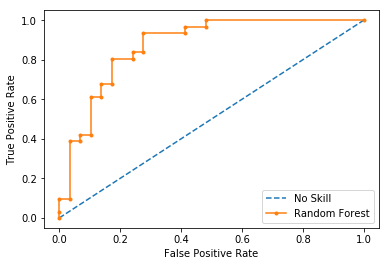

In [238]:
ns_probs = [0 for _ in range(len(test_labels))]
ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_labels, rf_prob)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

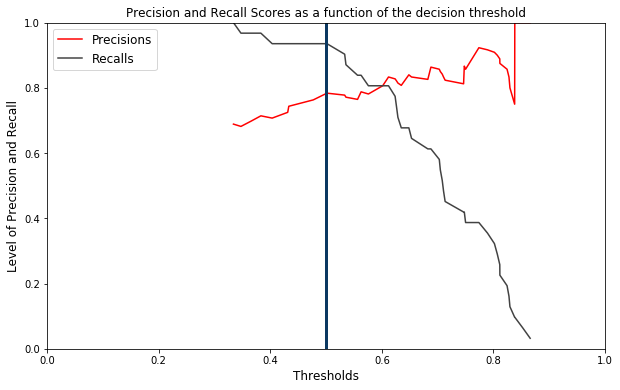

In [239]:
prec, rec, tre = precision_recall_curve(test_labels, rf_prob)
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(thresholds, precisions[:-1], 'r', label='Precisions')
    plt.plot(thresholds, recalls[:-1], '#424242', label='Recalls')
    plt.ylabel('Level of Precision and Recall', fontsize=12)
    plt.title('Precision and Recall Scores as a function of the decision threshold', fontsize=12)
    plt.xlabel('Thresholds', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.axvline(x=0.5, linewidth=3, color='#0B3861')

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [242]:
perm = PermutationImportance(rf, random_state=1).fit(train_features, train_labels)
eli5.show_weights(perm, feature_names = X.columns.tolist())

ValueError: feature_names has a wrong length: expected=18, got=19